In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv("train.csv")

y_train = df_train["Survived"]
X_train = df_train.drop(["Survived", "Cabin", "Embarked"], axis = 1)
y_test = pd.read_csv("gender_submission.csv")["Survived"]
X_test = pd.read_csv("test.csv").drop(["Cabin", "Embarked"], axis = 1)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test], ignore_index = True)

df = X.copy()
df["Survived"] = y

# print(X_train.shape[0], y_train.size, X_test.shape[0], y_test.size)
print("Train size: {}\nTest size: {}\n".format(X_train.shape[0], X_test.shape[0]) ) 

print(X_train.columns)

Train size: 891
Test size: 418

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')


In [41]:
survived = df[ df["Survived"] == 1]
not_survived = df[ df["Survived"] == 0]

print("Survived Statistics:")
print(survived.describe())

print("\nNot Survived Statistics:")
print(not_survived.describe())

Survived Statistics:
       PassengerId      Pclass         Age       SibSp       Parch  \
count   505.000000  505.000000  418.000000  505.000000  505.000000   
mean    659.144554    2.067327   28.930622    0.445545    0.390099   
std     380.892025    0.863399   14.484727    0.713743    0.715684   
min       2.000000    1.000000    0.420000    0.000000    0.000000   
25%     330.000000    1.000000   20.000000    0.000000    0.000000   
50%     645.000000    2.000000   28.000000    0.000000    0.000000   
75%     976.000000    3.000000   36.750000    1.000000    1.000000   
max    1309.000000    3.000000   80.000000    4.000000    5.000000   

             Fare  Survived  
count  505.000000     505.0  
mean    43.928036       1.0  
std     63.737427       0.0  
min      0.000000       1.0  
25%      9.350000       1.0  
50%     21.000000       1.0  
75%     52.000000       1.0  
max    512.329200       1.0  

Not Survived Statistics:
       PassengerId      Pclass         Age       Sib

# Analysing Age feature

In [35]:
age_series = X["Age"]
age_series.describe()

ascending_ages = age_series.sort_values(ascending = True)
unique_ages = pd.unique(age_series)
estimated_ages = age_series[age_series%1 == 0.5]
n_estimated = estimated_ages.size
n_unique = unique_ages.size
print("Quantity of estimated ages: {}\nQuantity of unique ages: {}".format(n_estimated, n_unique) )

Quantity of estimated ages: 33
Quantity of unique ages: 99


## Plots

1309 1309


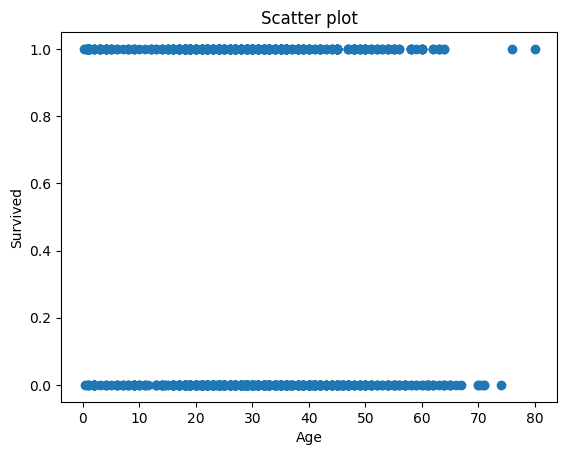

In [36]:
print(age_series.size, y.size)
plt.scatter(age_series, y)

plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Survived')

plt.show()

# Analysing Fare Feature

In [42]:
fare_series = X["Fare"]
fare_series.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

## Plots

1309 1309


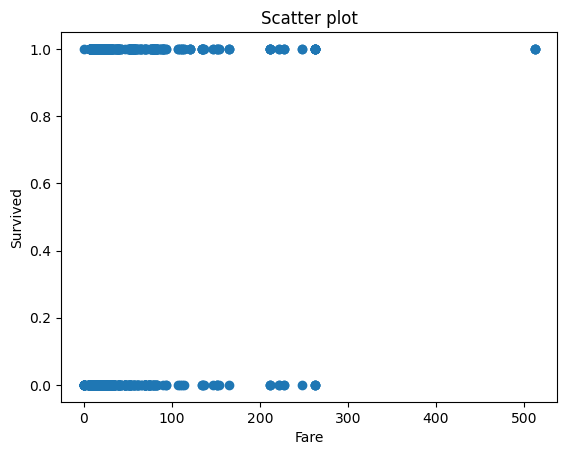

In [44]:
print(fare_series.size, y.size)
plt.scatter(fare_series, y)

plt.title('Scatter plot')
plt.xlabel('Fare')
plt.ylabel('Survived')

plt.show()